<a href="https://colab.research.google.com/github/bel4life/MNIST-Data-Project/blob/master/MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import sklearn
import matplotlib
import numpy as np

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [5]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

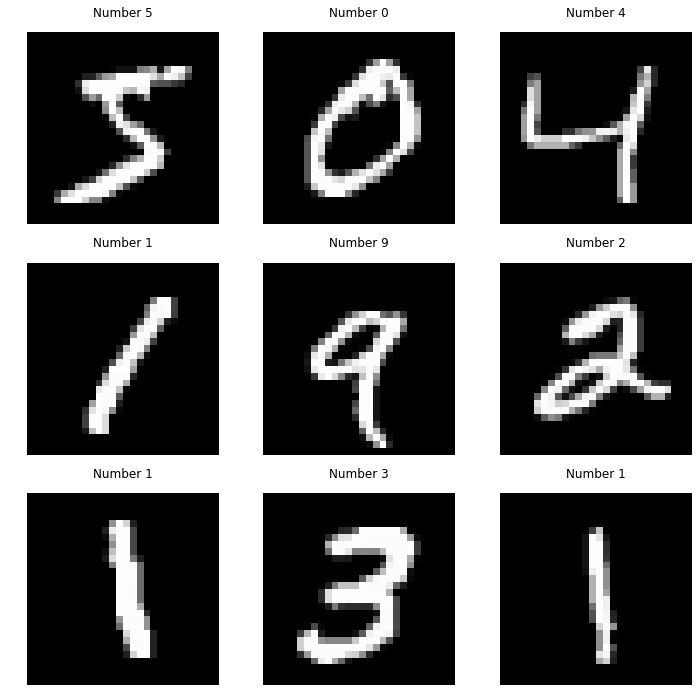

In [7]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
fig.show()

In [8]:
X = x_train.reshape(len(x_train),-1)
Y = y_train


X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [9]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)


kmeans = MiniBatchKMeans(n_clusters = n_digits)


kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [10]:
kmeans.labels_

array([2, 8, 7, ..., 2, 6, 3], dtype=int32)

In [0]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        
        labels = []
        index = np.where(kmeans.labels_ == i)

        
        labels.append(actual_labels[index])

        
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        
        if np.argmax(counts) in inferred_labels:
            
            inferred_labels[np.argmax(counts)].append(i)
        else:
            
            inferred_labels[np.argmax(counts)] = [i]

        
        
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [14]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[8 0 4 1 7 7 7 8 7 7 3 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [0]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [16]:
clusters = [10, 16, 36, 64, 144, 256]


for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    
    calculate_metrics(estimator, X, Y)
    
    
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2433675.5072501097
Homogeneity: 0.4431957470069071
Accuracy: 0.5356166666666666

Number of Clusters: 16
Inertia: 2204031.091530486
Homogeneity: 0.5513368234729253
Accuracy: 0.6431166666666667

Number of Clusters: 36
Inertia: 1962601.290334281
Homogeneity: 0.6885233985068312
Accuracy: 0.7748666666666667

Number of Clusters: 64
Inertia: 1814418.04000011
Homogeneity: 0.7336422967502735
Accuracy: 0.8000166666666667

Number of Clusters: 144
Inertia: 1633922.8552690065
Homogeneity: 0.803638925124219
Accuracy: 0.8643833333333333

Number of Clusters: 256
Inertia: 1519263.825350449
Homogeneity: 0.8375621390909395
Accuracy: 0.8924333333333333



In [17]:


X_test = x_test.reshape(len(x_test),-1)


X_test = X_test.astype(float) / 255.


kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)


test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    

print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.9035



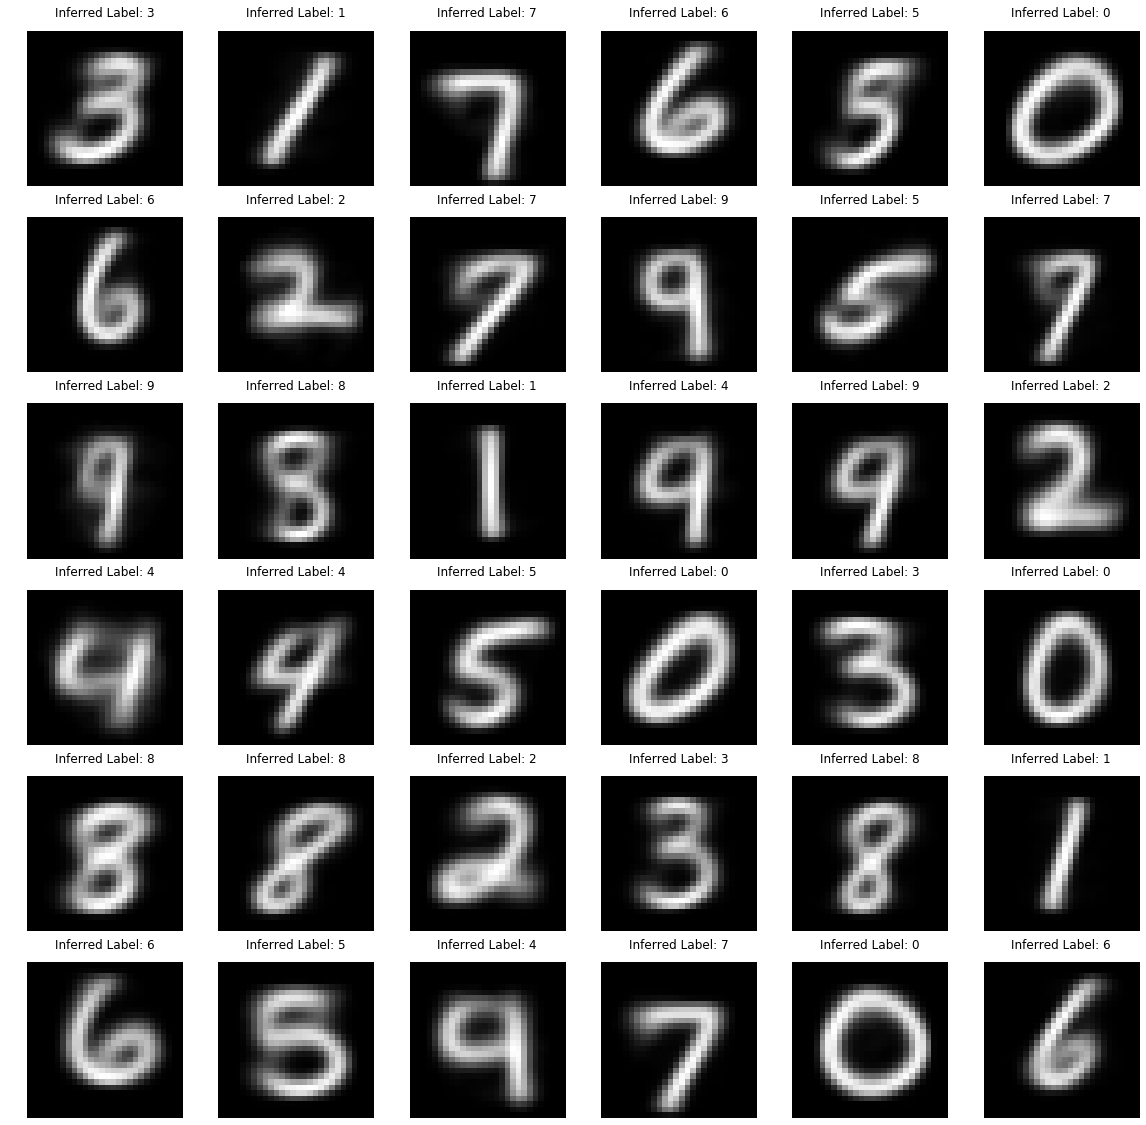

In [18]:

kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)


centroids = kmeans.cluster_centers_


images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)


cluster_labels = infer_cluster_labels(kmeans, Y)


fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()


for i, ax in enumerate(axs.flat):
    
    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    
    ax.matshow(images[i])
    ax.axis('off')
    

fig.show()